# Méthode d'Euler pour le calcul approché de primitives

## Présentation
- **Voie et niveau de classe :** 
 - Technologique : Première (spécialité physique-chimie et mathématiques)
- **Référence au programme :** 
 - Spécialité physique-chimie et mathématiques de première technologique : *Construire différents points d’une approximation de courbe intégrale par la méthode d’Euler.*
- **Description de l'activité :** Cette activité permet aux élèves d'utiliser la méthode d'Euler pour obtenir des courbes approchées de primitives des fonctions $t\mapsto \frac{1}{t}$ et $t\mapsto \frac{1}{1+t^2}$. La méthode d'Euler est utilisée en physique.


## Implémentation de la méthode

La fonction `Euler` prend en paramètres une fonction `f`, des flottants `a`, `Fa` et `b` et un entier `n`. Elle renvoie en sortie deux listes permettant de construire la courbe de la primitive de la fonction $f$ prenant en $a$ la valeur $F_a$, que l'on peut interpréter comme la solution de l'équation différentielle $y'(x)=f(x)$  vérifiant $y(a)=F_a$. 

In [1]:
def Euler(f,a,Fa,b,n):
    dt = (b-a)/n
    listeEulerAbscisse = [a]
    listeEulerOrdonnee = [Fa]
    x = a
    y = Fa
    for i in range(n):
        x = x + dt
        y = y + f(x)*dt
        listeEulerAbscisse.append(x)
        listeEulerOrdonnee.append(y)
    return listeEulerAbscisse,listeEulerOrdonnee

<div class="alert alert-info">

Suggestions pédagogiques
</div>

* **Expliquer un programme**

 - Que fait la fonction `Euler` ? 
 - Que représente `Fa` à la ligne 4 ?
 - Que représente `dt` ?
 
* **Compléter un programme**

 Le programme précédent étant fourni en remplaçant les lignes 4, 6, 8 et 9 par `listeEulerOrdonnee = [...]`, `y = ...`, `x = ...`, `y = ...`,  demander aux élèves de compléter les lignes 4, 6, 8 et 9.
 
*  **Écrire un programme**
 
 Écrire la fonction `Euler`.


## Définition des fonctions sur lesquelles on souhaite appliquer la méthode d'Euler

On applique la méthode d'Euler pour tracer les courbes approchées des primitives $F$ et $G$ des fonctions $f:t\mapsto \frac{1}{t}$ et $g:x\mapsto \frac{1}{1+t^2}$ vérifiant les conditions initiales $F(1)=0$ et $G(0)=0$.

In [2]:
def f(t):
    return 1/t

def g(t):
    return 1/(1+t**2)

<div class="alert alert-info">

Suggestions pédagogiques
</div>
 
*  **Écrire un programme**
 
 Écrire les fonctions informatiques `f` et `g` représentant les fonctions mathématiques $f$ et $g$.


## Représentation d'une primitive de la fonction $f:t\mapsto \frac{1}{t}$ par la méthode d'Euler

On souhaite maintenant représenter une approximation de la fonction $F$ sur $[1,10]$ pour $1000$ itérations.

Importation de la bibliothèque graphique :

In [3]:
from matplotlib.pyplot import plot,show

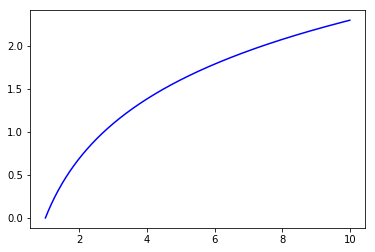

In [4]:
n = 1000

X,Y = Euler(f,1,0,10,n)

plot(X,Y,'b')
show()

<div class="alert alert-info">

Suggestions pédagogiques
</div>

* **Compléter un programme**

 Le programme précédent étant fourni en remplaçant la ligne 3 par `X,Y = Euler(...)`,  demander aux élèves de compléter la ligne 3.


## Représentation d'une primitive de la fonction $g:t\mapsto \frac{1} {1+t^2}$ par la méthode d'Euler

Dans cette partie, on souhaite approcher la courbe de la primitive $G$ de la fonction $g:t\mapsto \frac{1} {1+t^2}$ sur $[0,10]$ vérifiant $G(0)=0$.
Il faut donc distinguer deux cas. Cette courbe va être construite en partant de $0$ vers la droite puis vers la gauche. L'un avec un $dt$ positif qui construira la courbe «vers la droite» et l'autre avec un $dt$ négatif qui construire la fonction «vers la gauche».

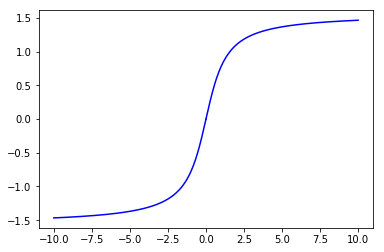

In [5]:
n = 1000

# dt positif de x=0 à x=2
X,Y = Euler(g,0,0,10,n)
plot(X,Y,'b')
# dt négatif de x=0 à x=-2
X,Y = Euler(g,0,0,-10,n)
plot(X,Y,'b')
show()

<div class="alert alert-info">

Suggestions pédagogiques
</div>

* **Expliquer un programme**

 - Comment expliquer la symétrie de la courbe obtenue ?
 - Distinguer la partie de la courbe liée à la ligne 5 de celle liée à la ligne 7.

## Animation susceptible d'être présentée aux élèves
Cette animation permet de visualiser la construction approchée par la méthode d'Euler des primitives des fonctions $f:t\mapsto \frac{1}{t}$ et $g:x\mapsto \frac{1}{1+t^2}$ vérifiant les conditions initiales $F(1)=0$ et $G(0)=0$.

In [6]:
%matplotlib inline
import matplotlib.animation
from IPython.display import HTML
from matplotlib.pyplot import close,subplots
#ctes: 
n =50
#Création des figures
fig, (ax1,ax2) = subplots(1, 2,figsize=(12, 6))
courbeEulerG, = ax2.plot([],[],'.-',color="#1e7fcb")
courbeEulerD, = ax2.plot([],[],'.-',color="#1e7fcb")
courbeEuler, = ax1.plot([],[],'.-',color="#C4151C")
#Réglage des axes
ax1.set_xlim(( 0.1, 40))
ax1.set_ylim(( 0, 6))
ax2.set_xlim(( -10, 10))
ax2.set_ylim(( -2, 2))

def init():
    global courbeEuler
    courbeEulerG.set_data([], [])
    courbeEulerD.set_data([], [])
    courbeEuler.set_data([], [])
    return (courbeEuler,) 

def animate(i):
    global courbeEuler,courbeEulerG,courbeEulerD
    n = i+1
    listeX1,listeY1 = Euler(f,1,0,40,n)
    
    listeX2dte,listeY2dte = Euler(g,0,0,10,n)
    listeX2gch,listeY2gch = Euler(g,0,0,-10,n)
    
    courbeEulerG.set_data(listeX2gch,listeY2gch)
    courbeEulerD.set_data(listeX2dte,listeY2dte)
    courbeEuler.set_data(listeX1,listeY1)
    ax1.set_title('Primitive de $t \mapsto \dfrac{1}{t}$',y=1.02,color="#C4151C")
    ax2.set_title('Primitive de $t \mapsto \dfrac{1}{1+t^2}$',y=1.02,color="#1e7fcb")
    return (courbeEuler,)
  
close ()
ani = matplotlib.animation.FuncAnimation(fig, animate, frames=n,init_func=init,blit=False,interval=200)
# l'un ou l'autre
HTML(ani.to_jshtml())
#HTML(ani.to_html5_video())